In [30]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',200)

In [31]:
import missingno as msno

In [32]:
df=pd.read_csv('../data/HR_comma_sep.csv')

In [33]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'area', 'salary'],
      dtype='object')

<AxesSubplot:>

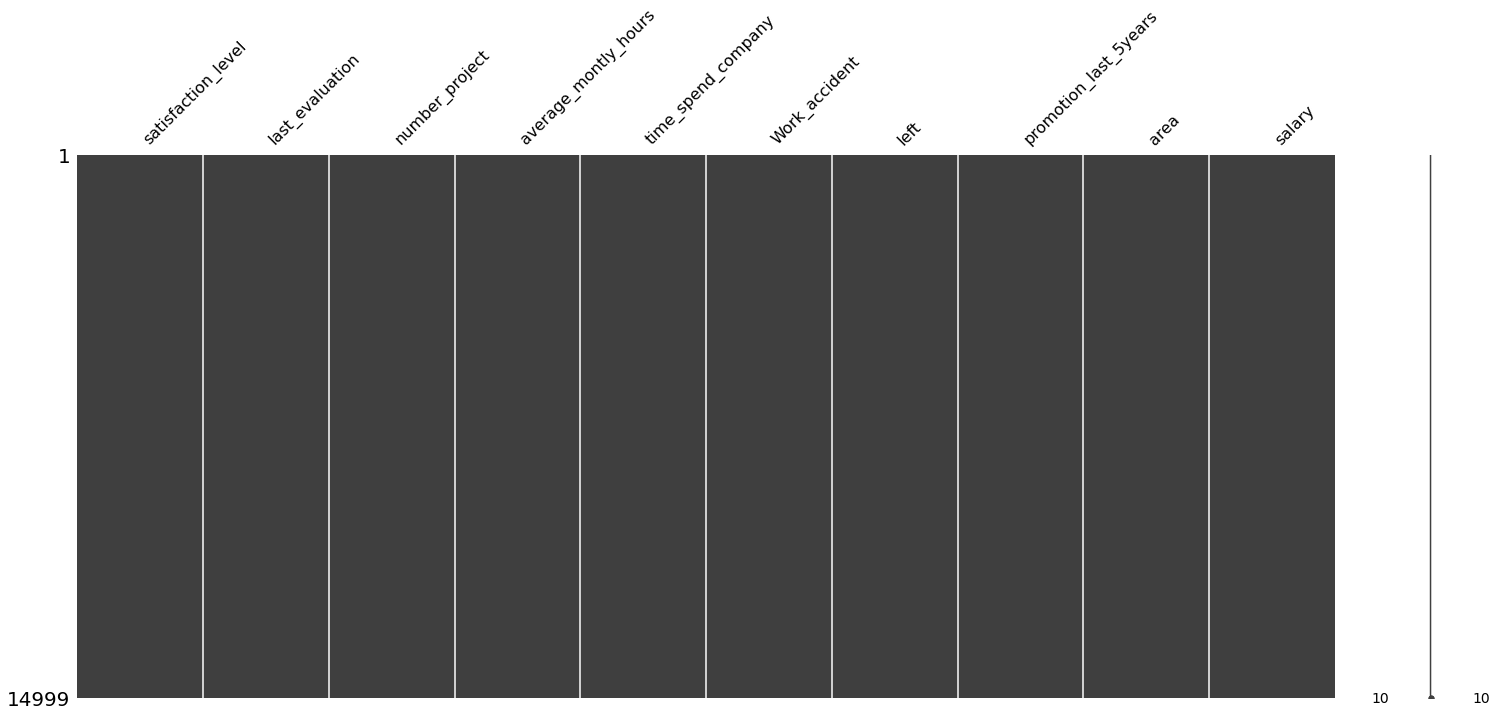

In [34]:
msno.matrix(df)

In [35]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [36]:
df['left'].value_counts(1)

0    0.761917
1    0.238083
Name: left, dtype: float64

In [37]:
df['area'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: area, dtype: int64

In [38]:
data=pd.get_dummies(data=df,columns=['area','salary'])

In [39]:
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,area_IT,area_RandD,area_accounting,area_hr,area_management,area_marketing,area_product_mng,area_sales,area_support,area_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [11]:
cols=[col for col in data.columns if col not in ['left','area_hr','salary_high']]

In [40]:
X=data[cols]
y=data['left']

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)

X_test=sc.transform(X_test)


In [45]:
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
count,1.349900e+04,1.349900e+04,1.349900e+04,1.349900e+04,1.349900e+04,1.349900e+04,1.349900e+04,1.349900e+04,1.349900e+04,1.349900e+04,1.349900e+04,1.349900e+04,1.349900e+04,1.349900e+04,1.349900e+04,1.349900e+04,1.349900e+04,1.349900e+04
mean,1.236962e-16,4.316209e-17,6.579587e-18,2.316015e-16,2.947655e-17,2.737108e-17,-2.842381e-17,2.526561e-17,-5.263669e-18,3.158202e-17,-2.105468e-17,7.053317e-17,3.684569e-17,-6.526950e-17,-2.105468e-17,-6.421677e-17,4.210936e-17,1.684374e-17
std,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00
min,-2.104614e+00,-2.083809e+00,-1.465302e+00,-2.104551e+00,-1.024286e+00,-4.110316e-01,-1.492122e-01,-2.980011e-01,-2.368428e-01,-2.331572e-01,-2.103532e-01,-2.456119e-01,-2.516585e-01,-6.157416e-01,-4.172917e-01,-4.725352e-01,-9.743275e-01,-8.683479e-01
25%,-6.980479e-01,-9.160519e-01,-6.538436e-01,-9.037701e-01,-3.403309e-01,-4.110316e-01,-1.492122e-01,-2.980011e-01,-2.368428e-01,-2.331572e-01,-2.103532e-01,-2.456119e-01,-2.516585e-01,-6.157416e-01,-4.172917e-01,-4.725352e-01,-9.743275e-01,-8.683479e-01
50%,1.458918e-01,1.815347e-02,1.576150e-01,-2.319754e-02,-3.403309e-01,-4.110316e-01,-1.492122e-01,-2.980011e-01,-2.368428e-01,-2.331572e-01,-2.103532e-01,-2.456119e-01,-2.516585e-01,-6.157416e-01,-4.172917e-01,-4.725352e-01,-9.743275e-01,-8.683479e-01
75%,8.290811e-01,8.939710e-01,9.690735e-01,8.773881e-01,3.436243e-01,-4.110316e-01,-1.492122e-01,-2.980011e-01,-2.368428e-01,-2.331572e-01,-2.103532e-01,-2.456119e-01,-2.516585e-01,1.624058e+00,-4.172917e-01,-4.725352e-01,1.026349e+00,1.151612e+00
max,1.552458e+00,1.653013e+00,2.591991e+00,2.178234e+00,4.447356e+00,2.432903e+00,6.701863e+00,3.355692e+00,4.222210e+00,4.288953e+00,4.753909e+00,4.071464e+00,3.973638e+00,1.624058e+00,2.396405e+00,2.116244e+00,1.026349e+00,1.151612e+00


In [46]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [49]:
lda=LinearDiscriminantAnalysis()

In [50]:
lda.fit(X_train,y_train)

LinearDiscriminantAnalysis()

In [51]:
lda.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [52]:
from sklearn.metrics import roc_auc_score,accuracy_score,confusion_matrix

In [53]:
def metricas(model,Xv,yv): #Mide efectividad de un Modelo Predictivo
    print( " Roc Validate: %.3f" %roc_auc_score(y_score=model.predict_proba(Xv)[:,1],y_true=yv))
    print( " Acc Validate: %.3f" %accuracy_score(y_pred=model.predict(Xv),y_true=yv))
    print( " Matrix Conf Validate: ", "\n",confusion_matrix(y_pred=model.predict(Xv),y_true=yv))

In [54]:
metricas(lda,X_train,y_train)

 Roc Validate: 0.817
 Acc Validate: 0.779
 Matrix Conf Validate:  
 [[9494  793]
 [2190 1022]]


In [55]:
metricas(lda,X_test,y_test)

 Roc Validate: 0.822
 Acc Validate: 0.784
 Matrix Conf Validate:  
 [[1055   86]
 [ 238  121]]


In [56]:
from sklearn.metrics import roc_curve


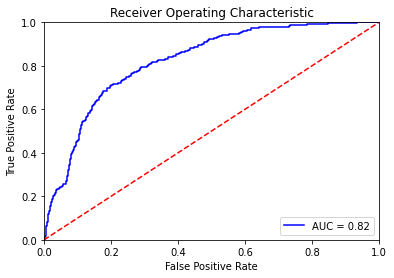

In [57]:
import matplotlib.pyplot as plt
fpr, tpr, thresh = roc_curve(y_test,lda.predict_proba(X_test)[:,1])
plt.title('Receiver Operating Characteristic')
auc = roc_auc_score(y_test,lda.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, 'b', label = f'AUC = {auc.round(2)}')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [58]:
from sklearn.metrics import plot_roc_curve

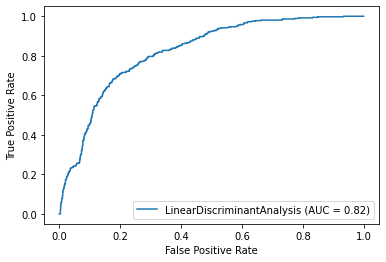

In [59]:
plot_roc_curve(lda,X_test,y_test,drop_intermediate=False)

pd.to_pickle(lda,'lda_model.pkl')